In [ ]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
from pysentimiento import create_analyzer
import time
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def json_to_list(json_file):
  with open(json_file) as f:
    data = json.load(f)
  tweets_text =  []
  for tweet in data:
    tweets_text.append(tweet["body"])
  return tweets_text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ADA_COLAU_TWEETS_PATH = '/content/drive/My Drive/Naveler/03.TECH/data_discovery/datasets/ada_colau.json'
PEDRO_SANCHEZ_TWEETS_PATH = '/content/drive/My Drive/Naveler/03.TECH/data_discovery/datasets/pedro_sanchez.json'

ada_colau_tweets = json_to_list(ADA_COLAU_TWEETS_PATH)
pedro_sanchez_tweets = json_to_list(PEDRO_SANCHEZ_TWEETS_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sentiment_analyzer = create_analyzer(task="sentiment", lang="es")

Ada Colau

In [ ]:
ada_colau_scores = []
t0 = time.perf_counter()
for tweet in ada_colau_tweets:
  output = sentiment_analyzer.predict(tweet)
  prob_pos, prob_neu, prob_neg = output.probas["POS"], output.probas["NEU"], output.probas["NEG"]
  score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
  ada_colau_scores.append(score)
dt = time.perf_counter() - t0
print(f'Analyzing {len(ada_colau_tweets)} tweets took {round(dt, 2)} seconds')

Analyzing 1000 tweets took 171.79 seconds


Time with GPU: 19,75 s

Time without GPU: 171,79 s

In [ ]:
# Look for time efficiency
ada_colau_scores2 = []
t0 = time.perf_counter()
outputs = sentiment_analyzer.predict(ada_colau_tweets)
for output in outputs:
  prob_pos, prob_neu, prob_neg = output.probas["POS"], output.probas["NEU"], output.probas["NEG"]
  score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
  ada_colau_scores2.append(score)
dt = time.perf_counter() - t0
print(f'Analyzing {len(ada_colau_tweets)} tweets took {round(dt, 2)} seconds')

Parameter 'function'=<function Analyzer._tokenize at 0x7fec70fbe710> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/32 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


Analyzing 1000 tweets took 221.85 seconds


Time with GPU: 3,22 s

Time without GPU: 221,85 s

In [ ]:
# Check
rounded_scores1 = [round(score, 2) for score in ada_colau_scores]
rounded_scores2 = [round(score, 2) for score in ada_colau_scores2]
print(rounded_scores1 == rounded_scores2)

True


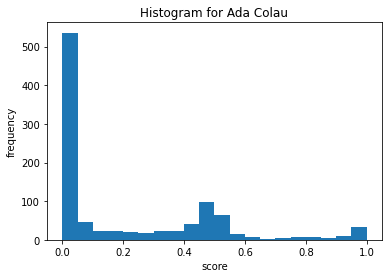

Median: 0.03
95% confidence interval: [0.0, 0.98]


In [ ]:
plt.hist(ada_colau_scores, bins=20)
plt.title("Histogram for Ada Colau")
plt.xlabel("score")
plt.ylabel("frequency")
plt.show()

median = np.median(ada_colau_scores)
print(f'Median: {round(median, 2)}')
percentiles = np.percentile(ada_colau_scores, [2.5, 97.5])
print(f'95% confidence interval: [{round(percentiles[0], 2)}, {round(percentiles[1], 2)}]')

Pedro Sánchez

In [ ]:
pedro_sanchez_scores = []
t0 = time.perf_counter()
for tweet in pedro_sanchez_tweets:
  output = sentiment_analyzer.predict(tweet)
  prob_pos, prob_neu, prob_neg = output.probas["POS"], output.probas["NEU"], output.probas["NEG"]
  score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
  pedro_sanchez_scores.append(score)
dt = time.perf_counter() - t0
print(f'Analyzing {len(ada_colau_tweets)} tweets took {round(dt, 2)} seconds')

Analyzing 1000 tweets took 169.92 seconds


Time with GPU: 14,19 s

Time without GPU: 169,92 s

In [ ]:
# Look for time efficiency
pedro_sanchez_scores2 = []
t0 = time.perf_counter()
outputs = sentiment_analyzer.predict(pedro_sanchez_tweets)
for output in outputs:
  prob_pos, prob_neu, prob_neg = output.probas["POS"], output.probas["NEU"], output.probas["NEG"]
  score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
  pedro_sanchez_scores2.append(score)
dt = time.perf_counter() - t0
print(f'Analyzing {len(ada_colau_tweets)} tweets took {round(dt, 2)} seconds')

  0%|          | 0/32 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


Analyzing 1000 tweets took 242.98 seconds


Time with GPU: 3,47 s

Time without GPU: 242,98 s

In [ ]:
# Check
rounded_scores1 = [round(score, 2) for score in pedro_sanchez_scores]
rounded_scores2 = [round(score, 2) for score in pedro_sanchez_scores2]
print(rounded_scores1 == rounded_scores2)

True


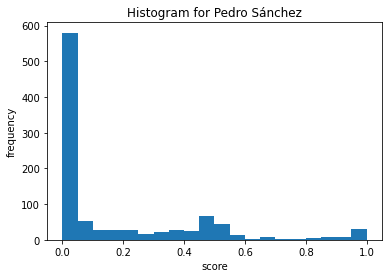

Median: 0.02
95% confidence interval: [0.0, 0.98]


In [ ]:
plt.hist(pedro_sanchez_scores, bins=20)
plt.title("Histogram for Pedro Sánchez")
plt.xlabel("score")
plt.ylabel("frequency")
plt.show()

median = np.median(pedro_sanchez_scores)
print(f'Median: {round(median, 2)}')
percentiles = np.percentile(pedro_sanchez_scores, [2.5, 97.5])
print(f'95% confidence interval: [{round(percentiles[0], 2)}, {round(percentiles[1], 2)}]')